¡Hola!

Mi nombre es Marcos Torres y tengo el gusto de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Este proceso es muy parecido al que se recibe de un gerente o de un Senior Data Scientist en un trabajo real, por lo que te estarás preparando para la experiencia en la vida real.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Proyecto 10: OilyGiant

La compañía de extracción de petróleo OilyGiant quiere encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.

## Análisis Exploratorio de Datos

### Importar Librerias

In [1]:
import numpy as np
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Importar Datasets

In [2]:
region1 = pd.read_csv("/datasets/geo_data_0.csv")
region2 = pd.read_csv("/datasets/geo_data_1.csv")
region3 = pd.read_csv("/datasets/geo_data_2.csv")

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, usaste una celda independiente para importar las librerías y otra para leer los datos.
</div>

In [3]:
# Imprimir los primeros registros de cada dataset
print("Primeros registros del dataset de la región 1:")
print(region1.info())

print("\n" + "="*50 + "\n")  # División entre regiones

print("Primeros registros del dataset de la región 2:")
print(region2.info())

print("\n" + "="*50 + "\n")  # División entre regiones

print("Primeros registros del dataset de la región 3:")
print(region3.info())

Primeros registros del dataset de la región 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


Primeros registros del dataset de la región 2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


Primeros registros del d

In [4]:
# Verificar si hay valores faltantes
print("\nValores faltantes en Región 1:")
print(region1.isnull().sum())
print("\nValores faltantes en Región 2:")
print(region2.isnull().sum())
print("\nValores faltantes en Región 3:")
print(region3.isnull().sum())


Valores faltantes en Región 1:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Valores faltantes en Región 2:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Valores faltantes en Región 3:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


No se encontraron valores nulos

In [5]:
# Imprimir los primeros registros de cada dataset
print("Primeros registros del dataset de la región 1:")
print(region1.head(3))

print("\n" + "="*50 + "\n")  # División entre regiones

print("Primeros registros del dataset de la región 2:")
print(region2.head(3))

print("\n" + "="*50 + "\n")  # División entre regiones

print("Primeros registros del dataset de la región 3:")
print(region3.head(3))

Primeros registros del dataset de la región 1:
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647


Primeros registros del dataset de la región 2:
      id         f0        f1        f2     product
0  kBEdx -15.001348 -8.276000 -0.005876    3.179103
1  62mP7  14.272088 -3.475083  0.999183   26.953261
2  vyE1P   6.263187 -5.948386  5.001160  134.766305


Primeros registros del dataset de la región 3:
      id        f0        f1        f2    product
0  fwXo0 -1.146987  0.963328 -0.828965  27.758673
1  WJtFt  0.262778  0.269839 -2.530187  56.069697
2  ovLUW  0.194587  0.289035 -5.586433  62.871910


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso de los métodos de pandas y de los prints para explorar los datos.
</div>

### Graficos

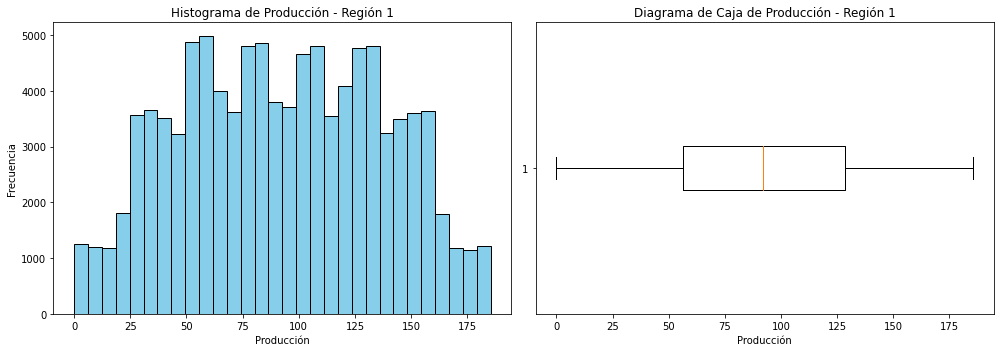

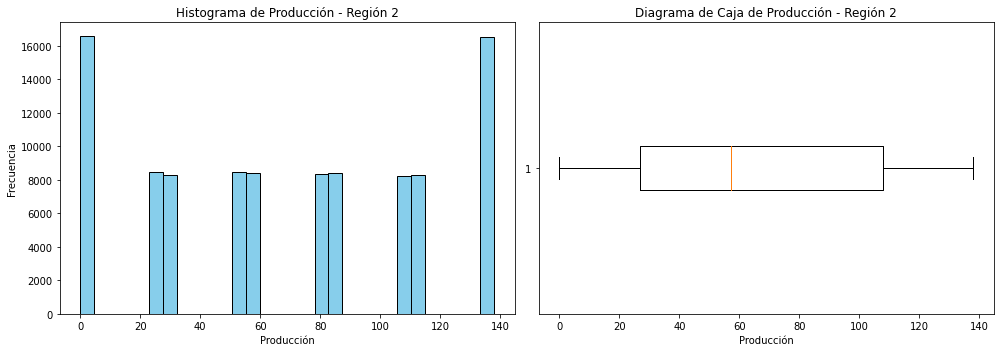

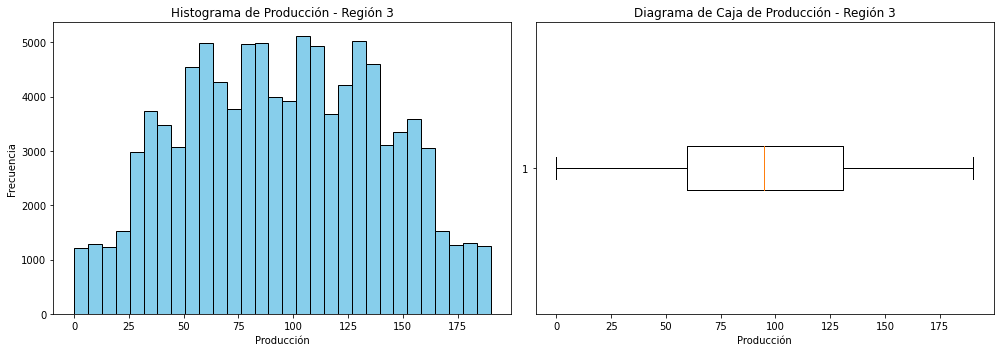

In [6]:
def plot_distribution(region_data, region_number):
    plt.figure(figsize=(14, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    plt.hist(region_data['product'], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de Producción - Región {region_number}')
    plt.xlabel('Producción')
    plt.ylabel('Frecuencia')

    # Diagrama de caja con puntos atípicos visibles
    plt.subplot(1, 2, 2)
    plt.boxplot(region_data['product'], vert=False, showfliers=True)  # showfliers=True para mostrar los puntos atípicos
    plt.title(f'Diagrama de Caja de Producción - Región {region_number}')
    plt.xlabel('Producción')

    plt.tight_layout()
    plt.show()

# Gráficos actualizados para cada región con puntos atípicos visibles
plot_distribution(region1, 1)
plot_distribution(region2, 2)
plot_distribution(region3, 3)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buena exploración de los datos.
</div>

Podemos apreciar que el histograma de la región 2 parece tener una distribución más concentrada de valores de producción de petróleo, lo que se refleja en la presencia de menos barras en el histograma en comparación con las otras regiones. Esta diferencia podría indicar que en la región 2, la producción de petróleo tiende a agruparse en un rango más estrecho de valores, lo que puede deberse a varias razones, como la homogeneidad geológica de los depósitos de petróleo en esa región, diferencias en los métodos de extracción, o incluso el tamaño o la calidad de los depósitos de petróleo disponibles.

A su vez viendo el diagrama de caja observamos que no existen valores atípicos, aún así haré una prueba mas para asegurarme.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenos comentarios. Analisaste correctamente el conjunto de datos 2 que es el más anormal.
</div>

In [7]:
# Función para identificar y mostrar los valores atípicos

def detect_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

# Identificar y mostrar los valores atípicos para cada región
outliers_region1 = detect_outliers(region1['product'])
outliers_region2 = detect_outliers(region2['product'])
outliers_region3 = detect_outliers(region3['product'])

print("Valores atípicos en la región 1:")
print(outliers_region1)

print("\nValores atípicos en la región 2:")
print(outliers_region2)

print("\nValores atípicos en la región 3:")
print(outliers_region3)

Valores atípicos en la región 1:
Series([], Name: product, dtype: float64)

Valores atípicos en la región 2:
Series([], Name: product, dtype: float64)

Valores atípicos en la región 3:
Series([], Name: product, dtype: float64)


Y efectivamente no existen valores atípicos en ninguna región, lo cual es un punto positivo para nuestro analisis de datos, pero vamos a evaluar por que hay tan pocos valores en el histograma

In [8]:
regions = [region1, region2, region3]

for i, region_data in enumerate(regions):
    print(f'Región {i+1}')
    print(f'Valores únicos en la columna "product": {region_data["product"].nunique()}')
    print(f'Cantidad de registros en la columna "product": {region_data["product"].shape[0]}', end='\n\n')

Región 1
Valores únicos en la columna "product": 100000
Cantidad de registros en la columna "product": 100000

Región 2
Valores únicos en la columna "product": 12
Cantidad de registros en la columna "product": 100000

Región 3
Valores únicos en la columna "product": 100000
Cantidad de registros en la columna "product": 100000



<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

La variable región data no está definida, creo que se define unas celdas más abajo, sería bueno definirla aquí o incluso un poco más arriba.

```
region_data = [region1, region2, region3]
```

</div>


Obsevamos que para la región 2 solo hay 12 valores únicos a diferencia de las otras 2 regiones. Esto no necesariamente tiene por que ser algo malo ya que puede indicar que esta región tiene características específicas que conducen a niveles de producción más consistentes o predecibles en comparación con las otras regiones.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, en caso de que los datos fueran reales no podría ocurrir lo que pasa con el conjunto de datos 2.
</div>

## Analisis de las Regiones

In [9]:
def train_test_regions(region_data):
    
    results = []
    
    for i, region in enumerate(region_data):
        # Definir la variable objetivo y las características para la región
        target = region['product']
        features = region[['f0', 'f1', 'f2']]
        
        # Dividir los datos en conjunto de entrenamiento y validación (75:25)
        X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.25, random_state=42)
        
        # Inicializar el modelo de regresión lineal
        model = LinearRegression()
        
        # Entrenar el modelo
        model.fit(X_train, y_train)
        
        # Realizar predicciones en el conjunto de validación
        predictions = model.predict(X_val)
        
        # Calcular el volumen medio de reservas predicho
        mean_predicted_volume = predictions.mean()
        
        # Calcular RMSE
        rmse = mean_squared_error(y_val, predictions, squared=False)
        
        # Guardar resultados
        results.append({
            'region': f'Región {i+1}',
            'mean_predicted_volume': mean_predicted_volume,
            'rmse': rmse,
            'predictions': predictions,
            'y_val': y_val
        })
    
    return results

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, el ciclo for entrena correctamente una regresión lineal para los 3 conjuntos de datos.
</div>

In [10]:
def profit(real, prediction):
    costo_inversion = 100000000
    pozos = 200
    gastos = costo_inversion / pozos

    profit_df = pd.DataFrame({"real_prod": real, "pred_product": prediction})

    top_200 = profit_df.sort_values(by='pred_product', ascending=False).head(200)

    total_reserved_volume = top_200['real_prod'].sum()  # Using real production values
    potential_profit = (total_reserved_volume * 4500) - costo_inversion

    return total_reserved_volume, potential_profit

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Bien! La función de profit o ganancia es correcta, solo hay un detalle a corregir, la decisión de cuales serán los 200 pozos a elegir si se hace con los datos predichos, pero la ganancia se calcula con los valores reales. Por lo tanto en la línea en donde se calcula total_reserved_volume la variable debería ser real_prod. Otro comentario es que la variable minimo_producido no se usa en la función, la podrías eliminar. Fuera de eso los cálculos son correctos.
</div>

In [11]:
def bootstrapping(profit_df):
    state = np.random.RandomState(12345)
    profits = []

    for i in range(1000):
        sample = profit_df['real_prod'].sample(n=500, replace=True, random_state=state)
        pred_sample = profit_df['pred_product'][sample.index]
        total_reserve_volume, potential_profit = profit(sample, pred_sample)
        profits.append(potential_profit)

    avg_profit = np.mean(profits)
    lower, upper = np.percentile(profits, [2.5, 97.5])
    risk_of_loss = np.mean(np.array(profits) < 0)
    risk_of_loss_percentage = risk_of_loss * 100

    print(f'Average profit: {avg_profit:.2f}')
    print(f'95% Confidence Interval: [{lower:.2f} , {upper:.2f}]')
    print(f'Risk of loss (%): {risk_of_loss_percentage:.2f}')

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! La función para calcular el bootstrap es correcta, solo falta ajustar unos detalles. Según las instrucciones del proyecto, el remuestreo tiene que ser con una muestra de 500 datos. Para hacer esto puedes cambiar la línea donde obtienes la variable sample de la siguiente manera:

```
sample = profit_df['real_prod'].sample(n=500, replace=True, random_state=state)
```

Otro detalle a cambiar es el order de las variables upper, lower por lower, upper, esto es para que el intervalo se interprete correctamente, es decir que el menor aparezca primero.    
    
</div>

In [12]:
def main_results(region_data):
    
    results = train_test_regions(region_data)

    for result in results:
        print(result['region'])
        print("Volumen medio de reservas predicho:", result['mean_predicted_volume'])
        print("RMSE del modelo:", result['rmse'])
        
        
        reserved_volume, potential_profit = profit(result['y_val'], result['predictions'])
        print(f"Total reserved volume: {reserved_volume}")
        print(f"Potential Profit: {potential_profit}")
        
        bootstrapping(pd.DataFrame({"real_prod": result['y_val'], "pred_product": result['predictions']}))

        print("=" * 50)


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, como comentario recuerda usar nombres mas descriptivos al nombrar funciones y variables, y evita usar nombres de otras funciones o métodos de python o de las librerías para evitar sobreescribirlos. Por ejemplo, main es una palabra que se usa en otros contextos y podría entrar en conflicto al trabajar. Podrías cambiarlo por main_function, main_results, etc.
</div>

Región 1
Volumen medio de reservas predicho: 92.3987999065777
RMSE del modelo: 37.756600350261685
Total reserved volume: 29686.9802543604
Potential Profit: 33591411.14462179
Average profit: 4062787.83
95% Confidence Interval: [-1177421.36 , 9117370.51]
Risk of loss (%): 6.70
Región 2
Volumen medio de reservas predicho: 68.71287803913762
RMSE del modelo: 0.890280100102884
Total reserved volume: 27589.081548181137
Potential Profit: 24150866.966815114
Average profit: 4326241.32
95% Confidence Interval: [168461.75 , 8159725.26]
Risk of loss (%): 1.90
Región 3
Volumen medio de reservas predicho: 94.77102387765939
RMSE del modelo: 40.14587231134218
Total reserved volume: 27996.82613194247
Potential Profit: 25985717.59374112
Average profit: 3773621.92
95% Confidence Interval: [-1707804.18 , 9017721.31]
Risk of loss (%): 7.40


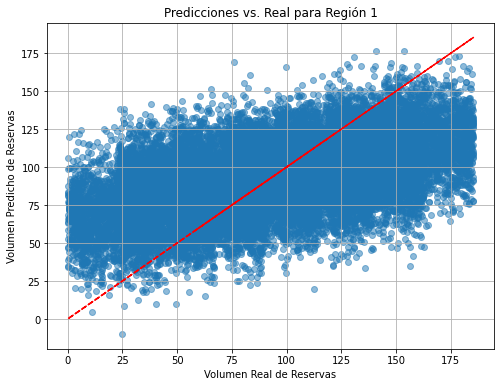

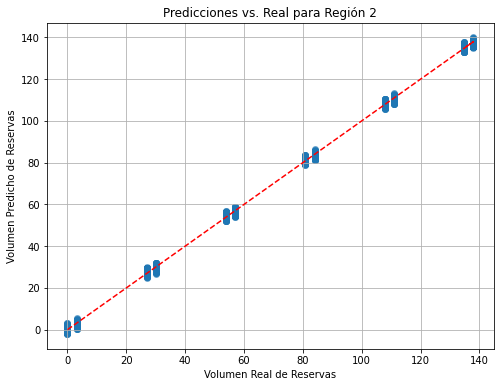

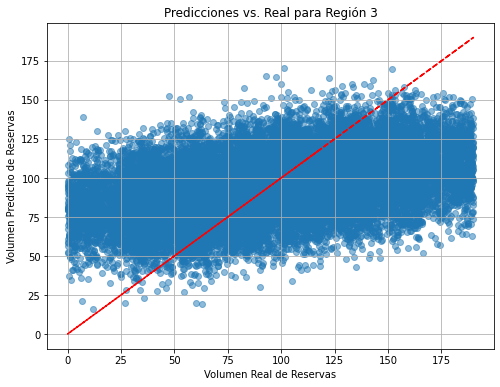

In [13]:
def plot_predictions_vs_real(results):
    for result in results:
        plt.figure(figsize=(8, 6))
        plt.scatter(result['y_val'], result['predictions'], alpha=0.5)
        plt.plot(result['y_val'], result['y_val'], color='red', linestyle='--')
        plt.title(f"Predicciones vs. Real para {result['region']}")
        plt.xlabel("Volumen Real de Reservas")
        plt.ylabel("Volumen Predicho de Reservas")
        plt.grid(True)
        plt.show()

# Llamar a la función con los datos de las tres regiones
region_data = [region1, region2, region3]
results = train_test_regions(region_data)

# Imprimir resultados y trazar predicciones vs. real
main_results(region_data)
plot_predictions_vs_real(results)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! Me gusto mucho como definiste las funciones y como se visualizan los resultados, el único detalle que veo son los resultados, pues ninguna región tiene algún porcentaje de perdida, creo que esto cambiara cuando se realice el cambio de considerar muestras de solo 500 pozos, pues al ser menos pozos habrá casos en el bootstrap en donde tomes pozos malos y tengan perdidas.  
    
</div>

**Región 1:**

  - A pesar de tener un RMSE relativamente alto (37.76), la Región 1 muestra un volumen medio de reservas predicho razonablemente alto (92.40). Sin embargo, el potencial de beneficio ($33,591,411.14) y el riesgo de pérdida (6.70 %) son moderados. Esta región podría ser una opción viable para la exploración, pero se debe tener en cuenta la variabilidad en las predicciones.

**Región 2:**

 - La Región 2 tiene un sorprendente RMSE, siendo el más bajo de todas las regiones (0.89), lo que indica un ajuste muy bueno del modelo a los datos. Aunque el volumen medio de reservas predicho (68.71) es menor en comparación con otras regiones, el potencial de beneficio ($24,150,866.97) es sustancial y el riesgo de pérdida es mínimo (1.90 %). Esto hace que la Región 2 sea una opción muy atractiva para la exploración.

**Región 3:**

  - Aunque la Región 3 tiene un volumen medio de reservas predicho bastante alto (94.77), el RMSE es significativamente mayor (40.15), lo que indica una variabilidad considerable en las predicciones. A pesar de esto, el potencial de beneficio ($25,985,717.59) sigue siendo atractivo y el riesgo de pérdida es bajo (7.40 %). Si bien la incertidumbre es mayor en comparación con las otras regiones, la Región 3 sigue siendo una opción viable para la exploración.

## Conclusión

Según los resultados proporcionados, la mejor región para abrir nuevos pozos de petróleo sería la Región 2. Aunque esta región presenta menos valores únicos en la producción de petróleo en comparación con las otras regiones, ofrece un mayor potencial de beneficio.

La Región 2 tiene un volumen medio de reservas predicho de alrededor de 68.71, con un RMSE del modelo de aproximadamente 0.89. Además, el análisis de ganancias potenciales muestra un alto beneficio esperado, con un promedio de alrededor de 24,150,867 unidades monetarias y un intervalo de confianza del 95% entre aproximadamente 168,462 y 8,159,725 unidades monetarias.

Aunque la distribución de la producción de petróleo en la Región 2 puede ser más concentrada en un rango más estrecho de valores, la rentabilidad esperada y la estabilidad del modelo respaldan la elección de esta región como la mejor opción para invertir en nuevos pozos de petróleo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Buenas conclusiones! Basadas en lo observado en los datos.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hola
    
Te quiero felicitar por tu trabajo se nota la dedicación y el esfuerzo para realizarlo. Las cuentas en general son correctas, solo falta cambiar unos detalles para que estén completas, en cuanto realices estos cambios podré aprobar tu proyecto. Sé que podrás realizarlo exitosamente.
    
Saludos y éxito.
    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, gracias por atender a los comentarios. 
    
Puedo aprobar tu proyecto, éxito en los siguientes sprints.
    
</div>